In [1]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import os
import pandas as pd
import numpy as np
import rpy2.robjects as ro
import sys

import scanpy as sc
import matplotlib.pyplot as plt

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

c:\Users\kyria.000\anaconda3\envs\Py310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [18]:
projectdir = "C:/Users/kyria.000/Documents/PhD/Projects/Feng2023/CoPImmunoPD/"
datadir = projectdir + "Data/"
resultdir = projectdir + "Result/"
# csv_list = os.listdir(datadir)

h5ad_list = [i for i in os.listdir(resultdir) if (i[-5:] == ".h5ad") and (i[3]=="C")] 
h5ad_list

['HC_CCR7mCD45ROm_preprocessed.h5ad',
 'HC_CCR7mCD45ROp_preprocessed.h5ad',
 'HC_CCR7pCD45ROm_preprocessed.h5ad',
 'HC_CCR7pCD45ROp_preprocessed.h5ad',
 'PD_CCR7mCD45ROm_preprocessed.h5ad',
 'PD_CCR7mCD45ROp_preprocessed.h5ad',
 'PD_CCR7pCD45ROm_preprocessed.h5ad',
 'PD_CCR7pCD45ROp_preprocessed.h5ad']

In [19]:

adatas=[]
for i in range(len(h5ad_list)):
    print(h5ad_list[i])
    file = resultdir+ h5ad_list[i]
    adata_it = sc.read_h5ad(file)
    adatas.append(adata_it)

adata = adatas[0].concatenate(adatas[1:], join='inner')
adata.X = adata.layers["soupX_counts"].copy()
adata.X.sort_indices()
print(np.shape(adata)) 


HC_CCR7mCD45ROm_preprocessed.h5ad
HC_CCR7mCD45ROp_preprocessed.h5ad
HC_CCR7pCD45ROm_preprocessed.h5ad
HC_CCR7pCD45ROp_preprocessed.h5ad
PD_CCR7mCD45ROm_preprocessed.h5ad
PD_CCR7mCD45ROp_preprocessed.h5ad
PD_CCR7pCD45ROm_preprocessed.h5ad
PD_CCR7pCD45ROp_preprocessed.h5ad


c:\Users\kyria.000\anaconda3\envs\Py310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\kyria.000\anaconda3\envs\Py310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\kyria.000\anaconda3\envs\Py310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of a

(40082, 13332)


In [22]:
adata.var_names_make_unique()

In [23]:
gene_symbols = pd.read_csv(projectdir+"/features.tsv",sep="\t",header=None)
symbols_in_dataset = adata.var_names 
gene_symbols_infile = gene_symbols[0].tolist()
check =  all(item in gene_symbols_infile for item in symbols_in_dataset)
if check is True:
    print("The ensmble in features contains all elements of the ensemble in merge dataset")   
else :
    print("No, feature.tsv doesn't have all elements of the  merge dataset.")


The ensmble in features contains all elements of the ensemble in merge dataset


In [27]:
gene_symbols.index = gene_symbols[0].tolist()
gene_symbols

,0,1,2
ENSG00000243485,ENSG00000243485,MIR1302-2HG,Gene Expression
ENSG00000237613,ENSG00000237613,FAM138A,Gene Expression
ENSG00000186092,ENSG00000186092,OR4F5,Gene Expression
ENSG00000238009,ENSG00000238009,AL627309.1,Gene Expression
ENSG00000239945,ENSG00000239945,AL627309.3,Gene Expression
...,...,...,...
ENSG00000277836,ENSG00000277836,AC141272.1,Gene Expression
ENSG00000278633,ENSG00000278633,AC023491.2,Gene Expression
ENSG00000276017,ENSG00000276017,AC007325.1,Gene Expression
ENSG00000278817,ENSG00000278817,AC007325.4,Gene Expression


In [28]:
gene_symbols1 = gene_symbols.reindex(symbols_in_dataset)
gene_symbols1

,0,1,2
ENSG00000237491,ENSG00000237491,LINC01409,Gene Expression
ENSG00000228794,ENSG00000228794,LINC01128,Gene Expression
ENSG00000225880,ENSG00000225880,LINC00115,Gene Expression
ENSG00000230368,ENSG00000230368,FAM41C,Gene Expression
ENSG00000188976,ENSG00000188976,NOC2L,Gene Expression
...,...,...,...
ENSG00000198727,ENSG00000198727,MT-CYB,Gene Expression
ENSG00000278384,ENSG00000278384,AL354822.1,Gene Expression
ENSG00000273748,ENSG00000273748,AL592183.1,Gene Expression
ENSG00000271254,ENSG00000271254,AC240274.1,Gene Expression


In [29]:
adata.var_names = gene_symbols1[1]
adata.var_names_make_unique()

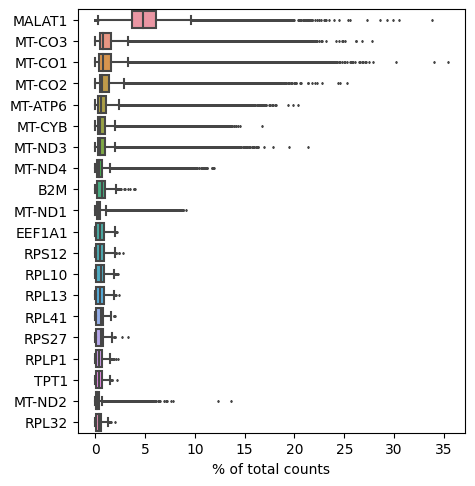

In [31]:
sc.pl.highest_expr_genes(adata, n_top=20)

## REMOVE GENES

In [ ]:
import re
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-", re.I)
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"), re.I)
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"), re.I)

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)

In [ ]:
adata.obs["mt_outlier"] =  adata.obs["pct_counts_mt"] > 20
adata.obs.mt_outlier.value_counts()

In [ ]:
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.mt_outlier)].copy()
print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

In [ ]:
import seaborn as sns
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")

In [ ]:
genes_remove = []
genes = adata[:,adata.var['mt']==True].var_names
info = 'Mito genes: '+str(len(genes))
print(info)
genes_remove.extend(genes)

genes = adata[:,adata.var['ribo']==True].var_names
info = 'Ribo genes: '+str(len(genes))
print(info)
genes_remove.extend(genes)

genes = adata[:,adata.var['hb']==True].var_names
info = 'Hb genes: '+str(len(genes))
print(info)
genes_remove.extend(genes)


genes_remove = list(set(genes_remove))
info = 'Remove '+str(len(genes_remove))+' genes.'
print(info)

genes_keep = list(set(adata.var_names) - set(genes_remove))
print('Keep '+str(len(genes_keep))+' genes.')

adata = adata[:, genes_keep]

info_meta = 'After genes filter:'
info = str(len(adata.obs))+' cells and '+str(len(adata.var))+' genes'

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)

In [ ]:
sc.tl.leiden(adata)
sc.tl.louvain(adata)


In [ ]:
sc.pl.umap(adata, color = ['Condition','CellType'])
sc.pl.tsne(adata, color ='Condition')
sc.pl.tsne(adata, color =['Condition','CellType'])

In [ ]:
sc.pl.umap(adata, color = ['Condition','CellType','leiden'])


In [ ]:
tmp = pd.crosstab(adata.obs['leiden'],adata.obs['CellType'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
tmp = pd.crosstab(adata.obs['leiden'],adata.obs['Condition'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
import scanpy.external as sce

sce.pp.harmony_integrate(adata, 'Condition')
sc.pl.embedding(adata, basis='X_pca_harmony', color = ['Condition'])
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.leiden(adata)
sc.tl.louvain(adata)
sc.tl.umap(adata)
adata.obsm["Harmonised_umap"] = adata.obsm["X_umap"].copy()

In [ ]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.tsne(adata,use_rep='X_pca_harmony')


In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color = ['Condition','CellType','leiden'])


In [ ]:
sc.pl.umap(adata, color = ['CellType'])


In [ ]:
sc.pl.tsne(adata, color = ['Condition','CellType','leiden'])


In [ ]:
tmp = pd.crosstab(adata.obs['leiden'],adata.obs['CellType'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
tmp = pd.crosstab(adata.obs['leiden'],adata.obs['Condition'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
sc.pl.umap(adata, color = ['louvain','CCR7','PTPRC'])


In [ ]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [ ]:
ls = adata.var_names
 
matches = [match for match in ls if "PTPRC" in match]
 
print(matches)

In [ ]:
sc.pl.dotplot(adata, ['PTPRC','CCR7'], groupby='louvain')
sc.pl.dotplot(adata, ['PTPRC','CCR7'], groupby='leiden')


In [ ]:
sc.pl.umap(adata, color = ['CellType'])
sc.pl.umap(adata, color = ['leiden'],legend_loc ="on data")
sc.pl.umap(adata, color = ['louvain'],legend_loc ="on data")


## Mitochondrial clusters

In [ ]:
mt_leiden_cl = pd.read_csv(resultdir+"Mito_leiden_cluster.csv")
list_mt_cl = mt_leiden_cl[mt_leiden_cl.columns[1]].values.tolist()
adata.obs['mito_leiden'] = [ "Mito_cl_"+str(x) for x in list_mt_cl ]  
sc.pl.umap(adata, color = ['mito_leiden'])#,legend_loc ="on data")

In [ ]:
adata.write(resultdir+'AnnData_Integrated.h5ad')


In [ ]:
adata

In [ ]:
sc.tl.rank_genes_groups(
    adata, groupby="louvain", method="wilcoxon", key_added="dea_louvain"
)


In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="louvain",
    standard_scale="var",
    n_genes=5,
    key="dea_louvain",
)

In [ ]:
sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="dea_louvain",
    key_added="dea_louvain_filtered",
)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="louvain",
    standard_scale="var",
    n_genes=5,
    key="dea_louvain_filtered",
)



In [ ]:
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

In [ ]:
ax = sc.pl.correlation_matrix(adata, 'louvain', figsize=(5,3.5))
ax = sc.pl.correlation_matrix(adata, 'leiden', figsize=(5,3.5))


In [ ]:
# Plotting functions - 'GProfiler-official version'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import colors
from matplotlib import rcParams


def scale_data_5_75(data):
    mind = np.min(data)
    maxd = np.max(data)
    
    if maxd == mind:
        maxd=maxd+1
        mind=mind-1
        
    drange = maxd - mind
    return ((((data - mind)/drange*0.70)+0.05)*100)
    
def plot_enrich(data, n_terms=20, save=False):
    # Test data input
    if not isinstance(data, pd.DataFrame):
        raise ValueError('Please input a Pandas Dataframe output by gprofiler.')
        
    if not np.all([term in data.columns for term in ['p_value', 'name', 'intersection_size']]):
        raise TypeError('The data frame {} does not contain enrichment results from gprofiler.'.format(data))
    
    data_to_plot = data.iloc[:n_terms,:].copy()
    data_to_plot['go.id'] = data_to_plot.index

    min_pval = data_to_plot['p_value'].min()
    max_pval = data_to_plot['p_value'].max()
    
    # Scale intersection_size to be between 5 and 75 for plotting
    #Note: this is done as calibration was done for values between 5 and 75
    data_to_plot['scaled.overlap'] = scale_data_5_75(data_to_plot['intersection_size'])
    
    norm = colors.LogNorm(min_pval, max_pval)
    sm = plt.cm.ScalarMappable(cmap="cool", norm=norm)
    sm.set_array([])

    rcParams.update({'font.size': 14, 'font.weight': 'bold'})

    sb.set(style="whitegrid")

    path = plt.scatter(x='recall', y="name", c='p_value', cmap='cool', 
                       norm=colors.LogNorm(min_pval, max_pval), 
                       data=data_to_plot, linewidth=1, edgecolor="grey", 
                       s=[(i+10)**1.5 for i in data_to_plot['scaled.overlap']])
    ax = plt.gca()
    ax.invert_yaxis()

    ax.set_ylabel('')
    ax.set_xlabel('Gene ratio', fontsize=14, fontweight='bold')
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Get tick marks for this plot
    #Note: 6 ticks maximum
    min_tick = np.floor(np.log10(min_pval)).astype(int)
    max_tick = np.ceil(np.log10(max_pval)).astype(int)
    tick_step = np.ceil((max_tick - min_tick)/6).astype(int)
    
    # Ensure no 0 values
    if tick_step == 0:
        tick_step = 1
        min_tick = max_tick-1
    
    ticks_vals = [10**i for i in range(max_tick, min_tick-1, -tick_step)]
    ticks_labs = ['$10^{'+str(i)+'}$' for i in range(max_tick, min_tick-1, -tick_step)]

    #Colorbar
    fig = plt.gcf()
    cbaxes = fig.add_axes([0.8, 0.15, 0.03, 0.4])
    cbar = ax.figure.colorbar(sm, ticks=ticks_vals, shrink=0.5, anchor=(0,0.1), cax=cbaxes)
    cbar.ax.set_yticklabels(ticks_labs)
    cbar.set_label("Adjusted p-value", fontsize=14, fontweight='bold')

    #Size legend
    min_olap = data_to_plot['intersection_size'].min()
    max_olap = data_to_plot['intersection_size'].max()
    olap_range = max_olap - min_olap
    
    #Note: approximate scaled 5, 25, 50, 75 values are calculated
    #      and then rounded to nearest number divisible by 5
    size_leg_vals = [np.round(i/5)*5 for i in 
                          [min_olap, min_olap+(20/70)*olap_range, min_olap+(45/70)*olap_range, max_olap]]
    size_leg_scaled_vals = scale_data_5_75(size_leg_vals)

    
    l1 = plt.scatter([],[], s=(size_leg_scaled_vals[0]+10)**1.5, edgecolors='none', color='black')
    l2 = plt.scatter([],[], s=(size_leg_scaled_vals[1]+10)**1.5, edgecolors='none', color='black')
    l3 = plt.scatter([],[], s=(size_leg_scaled_vals[2]+10)**1.5, edgecolors='none', color='black')
    l4 = plt.scatter([],[], s=(size_leg_scaled_vals[3]+10)**1.5, edgecolors='none', color='black')

    labels = [str(int(i)) for i in size_leg_vals]

    leg = plt.legend([l1, l2, l3, l4], labels, ncol=1, frameon=False, fontsize=12,
                     handlelength=1, loc = 'center left', borderpad = 1, labelspacing = 1.4,
                     handletextpad=2, title='Gene overlap', scatterpoints = 1,  bbox_to_anchor=(-2, 1.5), 
                     facecolor='black')

    if save:
        plt.savefig(save, dpi=300, format='pdf')

    plt.show()

In [ ]:
from gprofiler import GProfiler
#Interpretation of differentially expressed genes in paneth cells - g:profiler
gp = GProfiler(return_dataframe=True, user_agent='g:GOSt')

In [ ]:
Cl0_genes = sc.get.rank_genes_groups_df(adata, group="0",pval_cutoff=0.01,log2fc_min=0.5)
Cl0_enrichment = gp.profile(organism='hsapiens', sources=['GO:MF','GO:BP','KEGG','WikiPathways'], user_threshold=0.05,
                               significance_threshold_method='fdr', 
                               background=adata.var_names.tolist(), 
                               query=Cl0_genes['names'].tolist())
Cl0_enrichment_results = Cl0_enrichment.set_index('native').sort_values('p_value').iloc[:,[2,5,7,10,1]]
plot_enrich(Cl0_enrichment_results)

In [ ]:
import decoupler as dc
msigdb = dc.get_resource('MSigDB')
msigdb['collection'].unique()


In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']
msigdb


In [ ]:
# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

In [ ]:
dc.run_ora(mat=adata, net=msigdb, source='geneset', target='genesymbol', verbose=True,use_raw=False)


In [ ]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
sc.pl.umap(acts, color='HALLMARK_COAGULATION')

In [ ]:
mean_enr = dc.summarize_acts(acts, groupby='louvain', min_std=1)
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, vmax=20, cmap='viridis')
plt.show()

## MAP ON REFERENCE

In [ ]:
adata_query = adata.copy()
adata_ref = sc.datasets.pbmc3k_processed()  

In [ ]:
var_names = adata_ref.var_names.intersection(adata_query.var_names)
adata_ref = adata_ref[:, var_names]
adata_query = adata_query[:, var_names]

In [ ]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

In [ ]:
sc.pl.umap(adata_ref, color='louvain')

In [ ]:
sc.tl.ingest(adata_query, adata_ref, obs='louvain')


In [ ]:
adata_query.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors


In [ ]:
sc.pl.umap(adata_query, color=['louvain', 'CellType'], wspace=0.5)
